### Loan Delinquent Analysis

### Context
DRS bank is facing challenging times. Their NPAs (Non-Performing Assets) have been on a rise recently and a large part of these are due to the loans given to individual customers(borrowers). The Chief Risk Officer of the bank decides to put in a scientifically robust framework for approval of loans to individual customers to minimize the risk of loans converting into NPAs and initiates a project for the data science team at the bank. You, as a senior member of the team, are assigned this project.

### Objective
To identify the criteria to approve loans for an individual customer such that the likelihood of the loan delinquency is minimized

### Key questions to be answered
What are the factors that drive the behavior of loan delinquency?

### Data Description
- ID: Customer ID
- isDelinquent : indicates whether the customer is delinquent or not (1 => Yes, 0 => No)
- term: Loan term in months
- gender: Gender of the borrower
- age: Age of the borrower
- purpose: Purpose of Loan
- home_ownership: Status of borrower's home
- FICO: FICO (i.e. the bureau score) of the borrower

### Domain Information
Transactor – A person who pays his due amount balance full and on time.
Revolver – A person who pays the minimum due amount but keeps revolving his balance and does not pay the full amount.
Delinquent - Delinquency means that you are behind on payments, a person who fails to pay even the minimum due amount.
Defaulter – Once you are delinquent for a certain period your lender will declare you to be in the default stage.
Risk Analytics – A wide domain in the financial and banking industry, basically analyzing the risk of the customer.

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.metrics import(
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)

from sklearn.linear_model import LogisticRegression
import scipy.stats as stats

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 1.5 MB/s eta 0:00:0000:01


In [4]:
data = pd.read_csv('Loan_Delinquent_Dataset.csv')

In [5]:
data.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [6]:
data.shape

(11548, 8)

In [7]:
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


### Fixing the datatypes

In [9]:
df['term'] = df['term'].astype('category')
df['gender'] = df['gender'].astype('category')
df['purpose'] = df['purpose'].astype('category')
df['home_ownership'] = df['home_ownership'].astype('category')
df['age'] = df['age'].astype('category')
df['FICO'] = df['FICO'].astype('category')
df['isDelinquent'] = df['isDelinquent'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              11548 non-null  int64   
 1   isDelinquent    11548 non-null  category
 2   term            11548 non-null  category
 3   gender          11548 non-null  category
 4   purpose         11548 non-null  category
 5   home_ownership  11548 non-null  category
 6   age             11548 non-null  category
 7   FICO            11548 non-null  category
dtypes: category(7), int64(1)
memory usage: 170.4 KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

ID                0
isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

In [13]:
df.describe(include='all')

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.0,11548,11548,11548,11548,11548,11548
unique,NaN,2.0,2,2,7,3,2,2
top,NaN,1.0,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,7721.0,10589,6555,6892,5461,5888,6370
mean,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

In [14]:
df['ID'].nunique()

11548

In [15]:
df.drop(["ID"], inplace=True, axis=1)

In [16]:
df.head()

,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500
2,1,36 months,Female,House,Rent,>25,300-500
3,1,36 months,Female,Car,Mortgage,>25,300-500
4,1,36 months,Female,House,Rent,>25,300-500


In [17]:
df['purpose'].unique()

['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']
Categories (7, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding', 'other']

In [18]:
df['purpose'].replace('other','Other', inplace=True)

In [19]:
df['purpose'].unique()

['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical']
Categories (6, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding']

### Data Preparation for Modeling

In [20]:
x = df.drop(['isDelinquent'], axis=1)
y = df['isDelinquent']

In [21]:
# encoding the categorical variables

x = pd.get_dummies(x, drop_first=True)
x.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0


In [23]:
# splitting the data into training, validation and test data set

x_temp, x_test, y_temp, y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(x_train.shape, x_val.shape,x_test.shape) 

(6928, 11) (2310, 11) (2310, 11)


### Building the model

### Model evaluation criterion:
What does a bank want?

A bank wants to minimize the loss - it can face 2 types of losses here:
Whenever a bank lends money to a customer, they don't return that.
A bank doesn't lend money to a customer thinking a customer will default but in reality, the customer won't - opportunity loss.
Which loss is greater ?

Lending to a customer who wouldn't be able to pay back.
Since we want to reduce loan delinquency we should use Recall as a metric of model evaluation instead of accuracy.

Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting loan-delinquent customers as a non-loan-delinquent customer.

In [24]:
def model_performance_classification_sklearn(model,predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    
    df_perf = pd.DataFrame({
        'Accuracy': acc,
        'Recall': recall,
        'Precision': precision,
        'F1': f1
    }, index=[0])
    
    return df_perf

In [25]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot confusion matrix with percentage
    model: classifier
    predictors: independent variable
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
    ]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [26]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)

LogisticRegression(random_state=1)

##### Let's evaluate the model performance by using KFold and cross_val_score

K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

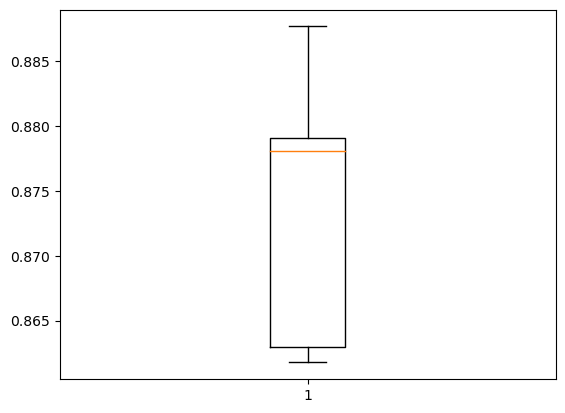

In [27]:
scoring = 'recall'
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cv_result_bfr = cross_val_score(estimator=lr, X=x_train, y= y_train, scoring=scoring, cv= kfold)
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training set varies between 0.86 to 0.87 recall.
- Let's check the performance on validation data.

In [28]:
log_reg_model_train_perf = model_performance_classification_sklearn(lr, x_train, y_train)
print("Training Performance \n", log_reg_model_train_perf)

Training Performance 
    Accuracy    Recall  Precision        F1
0  0.782621  0.872409   0.815375  0.842929


In [29]:
log_reg_model_val_perf = model_performance_classification_sklearn(lr, x_val, y_val)
print("Validation Performance \n", log_reg_model_val_perf)

Validation Performance 
    Accuracy    Recall  Precision        F1
0  0.797403  0.891909   0.820727  0.854839


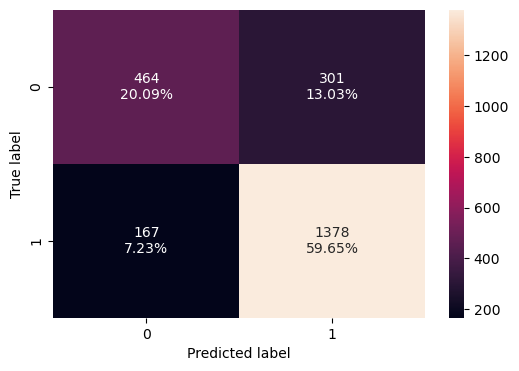

In [30]:
confusion_matrix_sklearn(lr, x_val, y_val)

- Logistic Regression has given a generalized performance on training and validation set.
- Let's try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [33]:
print("Before upsampling count of labels 'yes': {}".format(sum(y_train==1)))
print("Before upsampling count of labels 'no': {}".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

print("After upsampling count of labels 'yes': {} ".format(sum(y_train_over ==1)))
print("After upsampling count of labels 'no': {}".format(sum(y_train_over==0)))

print("After upsampling the shape of train_x: {}". format(x_train_over.shape))
print("After upsampling the shape of train_y: {}". format(y_train_over.shape))

Before upsampling count of labels 'yes': 4632
Before upsampling count of labels 'no': 2296
After upsampling count of labels 'yes': 4632 
After upsampling count of labels 'no': 4632
After upsampling the shape of train_x: (9264, 11)
After upsampling the shape of train_y: (9264,)


### Logistic Regression on oversampled data

In [34]:
log_reg_over = LogisticRegression(random_state=1)
log_reg_over.fit(x_train_over, y_train_over)

LogisticRegression(random_state=1)

##### Let's evaluate the model performance by using KFold and cross_val_score

K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

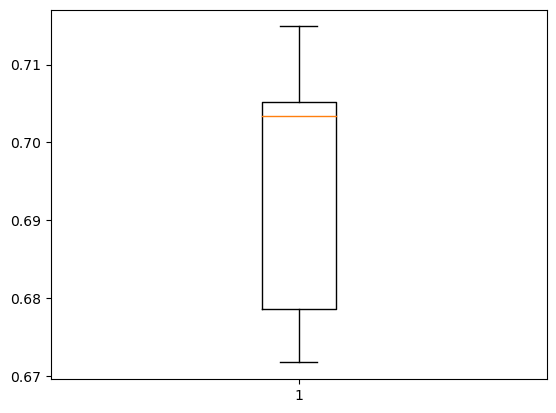

In [36]:
scoring = 'recall'
kfold = StratifiedKFold(n_splits = 5, shuffle= True, random_state=1)

cv_result_over = cross_val_score(estimator= log_reg_over, cv= kfold, X=x_train_over, y=y_train_over, scoring = scoring)
plt.boxplot(cv_result_over)
plt.show()

- Performance on training set varies between 0.69 to 0.70 recall
- Let's check the performance on Validation set

In [37]:
log_reg_over_train_perf = model_performance_classification_sklearn(log_reg_over, x_train_over, y_train_over)
print("Training Performance \n", log_reg_over_train_perf)

Training Performance 
    Accuracy    Recall  Precision        F1
0   0.76997  0.694732   0.817789  0.751255


In [38]:
log_reg_over_val_perf = model_performance_classification_sklearn(log_reg_over, x_val, y_val)
print("Validation Performance \n",log_reg_over_val_perf )

Validation Performance 
    Accuracy    Recall  Precision        F1
0  0.760606  0.719094   0.903252  0.800721


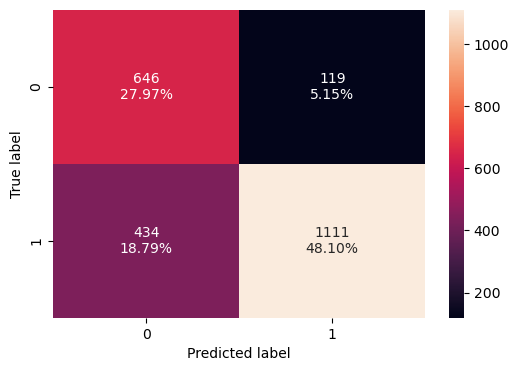

In [40]:
confusion_matrix_sklearn(log_reg_over, x_val, y_val)

- Performance on the training set improved but the model is not able to replicate the same for the validation set.
- Model is overfitting.
- Lets try:

a) Regularization to see if overfitting can be reduced

b) Undersampling the train to handle the imbalance between classes and check the model performance.

### Regularization

In [41]:
lr_estimator = LogisticRegression(random_state=1, solver='saga')

parameters = { 'C': np.arange(0.1,1.1,0.1)}

grid_obj = GridSearchCV(lr_estimator, parameters, scoring = 'recall')
grid_obj = grid_obj.fit(x_train_over, y_train_over)

lr_estimator = grid_obj.best_estimator_
lr_estimator.fit(x_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

In [42]:
lr_estimator_train_perf = model_performance_classification_sklearn(lr_estimator, x_train_over, y_train_over)
print("Training Performance \n", lr_estimator_train_perf)

Training Performance 
    Accuracy    Recall  Precision        F1
0  0.739529  0.694732   0.763102  0.727314


In [43]:
lr_estimator_val_perf = model_performance_classification_sklearn(lr_estimator, x_val, y_val)
print("Validation Performance \n", lr_estimator_val_perf)

Validation Performance 
    Accuracy    Recall  Precision        F1
0  0.748918  0.719094    0.88385  0.793005


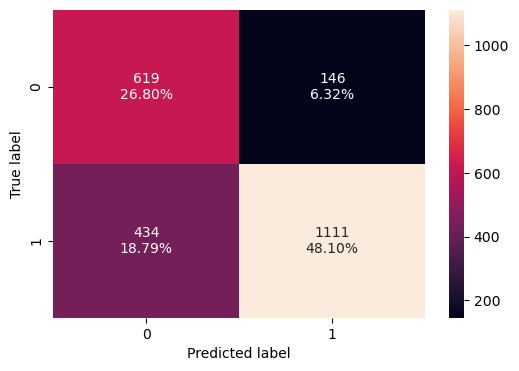

In [44]:
confusion_matrix_sklearn(lr_estimator, x_val, y_val)

- Recall is very good, but similar to previous model

### Under Sampling train data using RandomUnderSampler

In [45]:
rus = RandomUnderSampler(random_state=1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)


print("Before Under Sampling, count of 'yes': {}". format(sum(y_train == 1)))
print("Before under sampling, count of 'no': {}".format(sum(y_train ==0)))

print("After under sampling, count of 'yes': {}".format(sum(y_train_un == 1)))
print("After under sampling, count of 'no': {}".format(sum(y_train_un == 0)))

print("After under sampling, shape of the train_x {}". format(x_train_un.shape))
print("After under sampling, shape of the train_y {}". format(y_train_un.shape))

Before Under Sampling, count of 'yes': 4632
Before under sampling, count of 'no': 2296
After under sampling, count of 'yes': 2296
After under sampling, count of 'no': 2296
After under sampling, shape of the train_x (4592, 11)
After under sampling, shape of the train_y (4592,)


### Logistic regression on undersampled data

In [46]:
log_reg_un = LogisticRegression(random_state =1)
log_reg_un.fit(x_train_un, y_train_un)

LogisticRegression(random_state=1)

### Lets evaluate the model performance by using KFold and cross_val_score

- K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive
stratified folds (without shuffling by default). Each fold is then used once as validation while the k-1 remaining folds for the training set

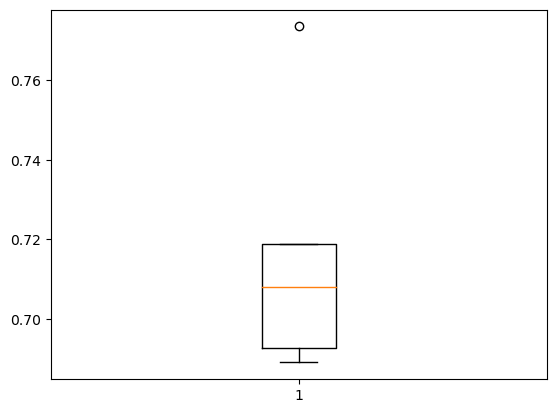

In [47]:
scoring ='recall'
kfold = StratifiedKFold(n_splits=5, shuffle= True, random_state=1)
cv_result_under = cross_val_score(estimator= log_reg_un, X=x_train_un, y=y_train_un, scoring=scoring, cv=kfold)
plt.boxplot(cv_result_under)
plt.show()

- Performance of model on training set varies between 0.70 to 0.76, which is similar to model with oversampled data
- Let's check the performance on the validation set.

In [48]:
log_reg_un_train_perf = model_performance_classification_sklearn(log_reg_un, x_train_un, y_train_un)

print("Training Performance \n", log_reg_un_train_perf)

Training Performance 
    Accuracy    Recall  Precision        F1
0  0.768075  0.708624   0.804251  0.753415


In [49]:
log_reg_un_val_perf = model_performance_classification_sklearn(log_reg_un, x_val, y_val)
print("Validation Performance \n", log_reg_un_val_perf)

Validation Performance 
    Accuracy    Recall  Precision        F1
0  0.769264  0.739806   0.897174  0.810926


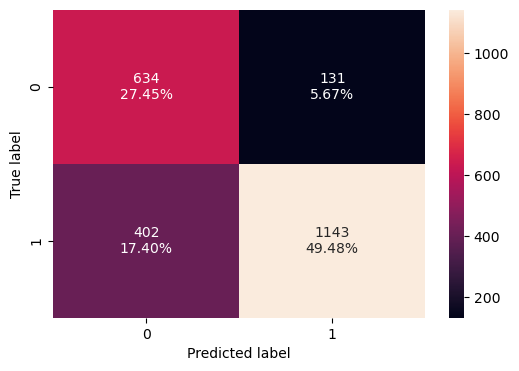

In [50]:
confusion_matrix_sklearn(log_reg_un, x_val, y_val)

- Model has given a generalized performance on training and validation set.
- Model performance has improved using downsampling - Logistic regression is now able to differentiate well between positive and negative classes.

In [54]:
# training performance comparison
models_train_comp_df = pd.concat([
    log_reg_model_train_perf.T,
    log_reg_over_train_perf.T,
    lr_estimator_train_perf.T,
    log_reg_un_train_perf.T
], axis=1)

models_train_comp_df.columns = ["Logistic Regression",
                                "Logistic Regression with oversampled data",
                                "Regularized Loristic Regression",
                                "Logistic Regression with undersampled data"
                               ]

print("Training Performance Comparison: \n")
models_train_comp_df

Training Performance Comparison: 



,Logistic Regression,Logistic Regression with oversampled data,Regularized Loristic Regression,Logistic Regression with undersampled data
Accuracy,0.782621,0.769970,0.739529,0.768075
Recall,0.872409,0.694732,0.694732,0.708624
Precision,0.815375,0.817789,0.763102,0.804251
F1,0.842929,0.751255,0.727314,0.753415


In [53]:
# Validation Performance Comparison

models_val_comp_df = pd.concat([log_reg_model_val_perf.T,
                               log_reg_over_val_perf.T,
                               lr_estimator_val_perf.T,
                               log_reg_un_val_perf.T], axis=1)
models_val_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.797403,0.760606,0.748918,0.769264
Recall,0.891909,0.719094,0.719094,0.739806
Precision,0.820727,0.903252,0.883850,0.897174
F1,0.854839,0.800721,0.793005,0.810926


- Initial logistic regression without sampling and regularization has given a generalized performance on training and validation set.

### We can see that first model is the best, let's check the performance of test data

In [57]:
# Calculating different metrics on validation set
log_reg_model_test_perf = model_performance_classification_sklearn(
    log_reg_un, x_test, y_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.765368,0.733808,0.896361,0.80698


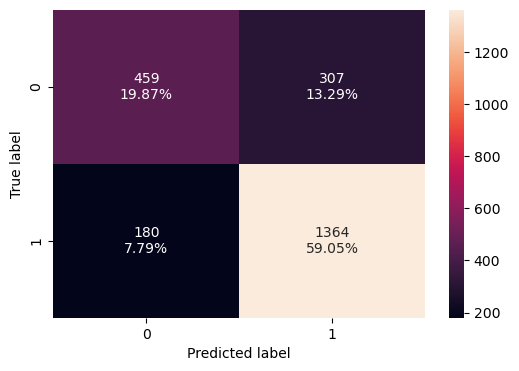

In [59]:
# creating confusion matrix
confusion_matrix_sklearn(lr, x_test, y_test)